## Importação das Bibliotecas

In [48]:
import numpy as np
import cv2 as cv

## Exibir as imagens de Ressonância Magnética

In [49]:
from matplotlib import pyplot as plt

def showSingleImage(img, title, size, mincolor=0, maxcolor=255):
    fig, axis = plt.subplots(figsize = size)

    axis.imshow(img, cmap='gray', vmin=mincolor, vmax=maxcolor)
    axis.set_title(title, fontdict = {'fontsize': 22, 'fontweight': 'medium'})
    plt.show()

def showMultipleImages(imgsArray, titlesArray, size, x, y, mincolor=0, maxcolor=255):
    if(x < 1 or y < 1):
        print("ERRO: X e Y não podem ser zero ou abaixo de zero!")
        return
    elif(x == 1 and y == 1):
        showSingleImage(imgsArray, titlesArray)
    elif(x == 1):
        fig, axis = plt.subplots(y, figsize = size)
        yId = 0
        for img in imgsArray:
            axis[yId].imshow(img, cmap='gray', vmin=mincolor, vmax=maxcolor)
            axis[yId].set_anchor('NW')
            axis[yId].set_title(titlesArray[yId], fontdict = {'fontsize': 18, 'fontweight': 'medium'}, pad = 10)

            yId += 1
    elif(y == 1):
        fig, axis = plt.subplots(1, x, figsize = size)
        fig.suptitle(titlesArray)
        xId = 0
        for img in imgsArray:
            axis[xId].imshow(img, cmap='gray', vmin=mincolor, vmax=maxcolor)
            axis[xId].set_anchor('NW')
            axis[xId].set_title(titlesArray[xId], fontdict = {'fontsize': 18, 'fontweight': 'medium'}, pad = 10)

            xId += 1
    else:
        fig, axis = plt.subplots(y, x, figsize = size)
        xId, yId, titleId = 0, 0, 0
        for img in imgsArray:
            axis[yId, xId].set_title(titlesArray[titleId], fontdict = {'fontsize': 18, 'fontweight': 'medium'}, pad = 10)
            axis[yId, xId].set_anchor('NW')
            axis[yId, xId].imshow(img, cmap='gray', vmin=mincolor, vmax=maxcolor)
            if(len(titlesArray[titleId]) == 0):
                axis[yId, xId].axis('off')

            titleId += 1
            xId += 1
            if xId == x:
                xId = 0
                yId += 1
    plt.show()

## Operações Morfológicas

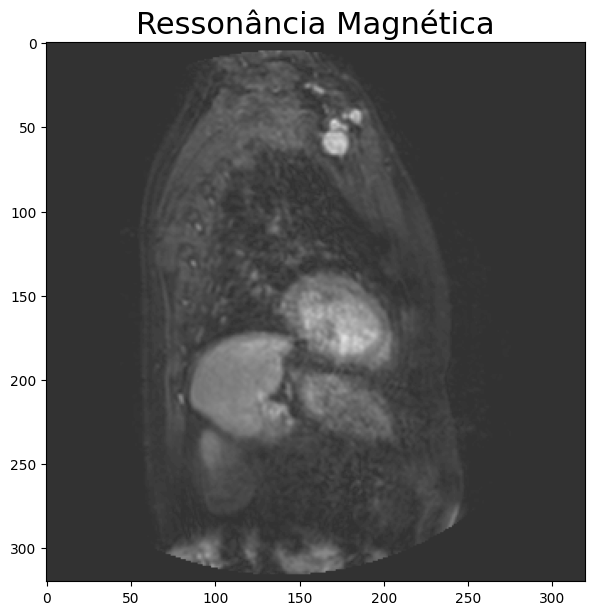

In [24]:
img_rm = cv2.imread("la_003_1.png", 0)
showSingleImage(img_rm, "Ressonância Magnética", (7, 7))

### Erosão

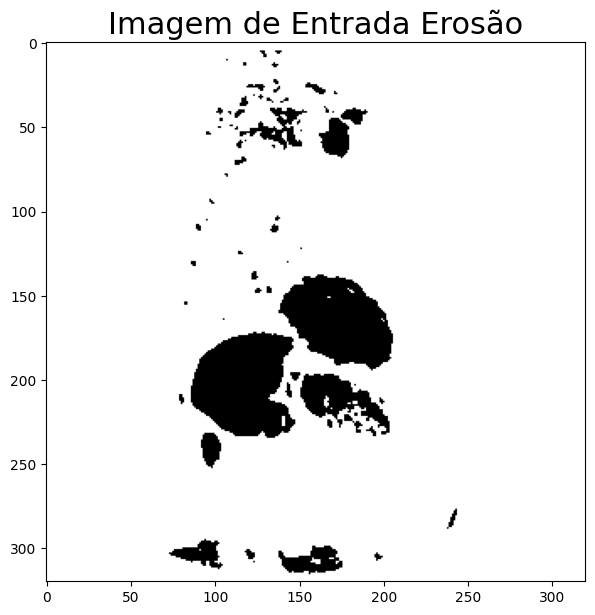

In [35]:
threshold, img_thresh = cv2.threshold(img_rm, 100, 255, cv2.THRESH_BINARY_INV)
showSingleImage(img_thresh, "Imagem de Entrada Erosão", (7, 7))

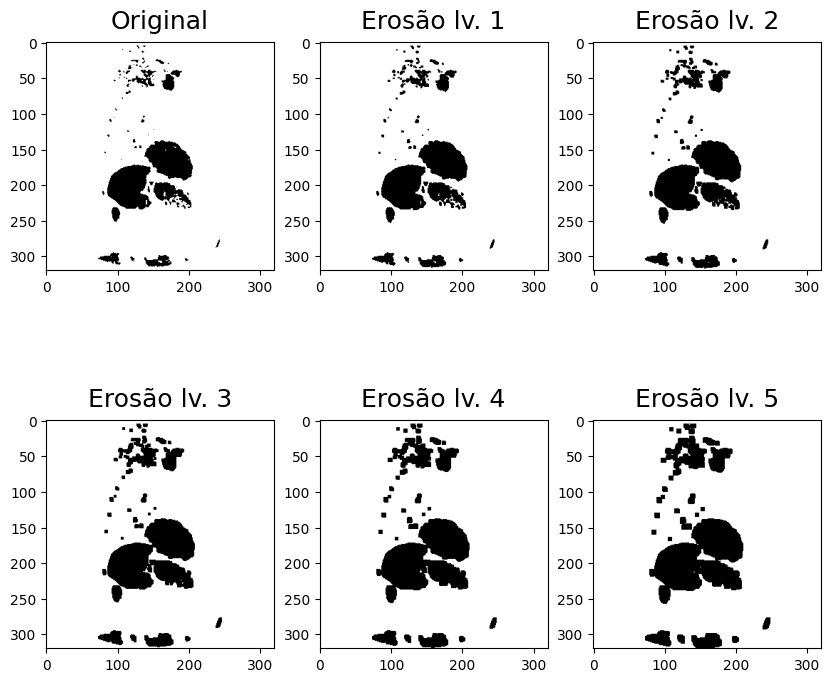

In [37]:
kernel = np.ones((2, 2), np.uint8)

img_rm_erode1 = cv2.erode(img_thresh, kernel, iterations=1)
img_rm_erode2 = cv2.erode(img_thresh, kernel, iterations=2)
img_rm_erode3 = cv2.erode(img_thresh, kernel, iterations=3)
img_rm_erode4 = cv2.erode(img_thresh, kernel, iterations=4)
img_rm_erode5 = cv2.erode(img_thresh, kernel, iterations=5)

imgsArray = [img_thresh, img_rm_erode1, img_rm_erode2, img_rm_erode3, img_rm_erode4, img_rm_erode5]
titlesArray = ['Original', 'Erosão lv. 1', 'Erosão lv. 2', 'Erosão lv. 3', 'Erosão lv. 4', 'Erosão lv. 5']
showMultipleImages(imgsArray, titlesArray, (10, 9), 3, 2)

### Dilatação

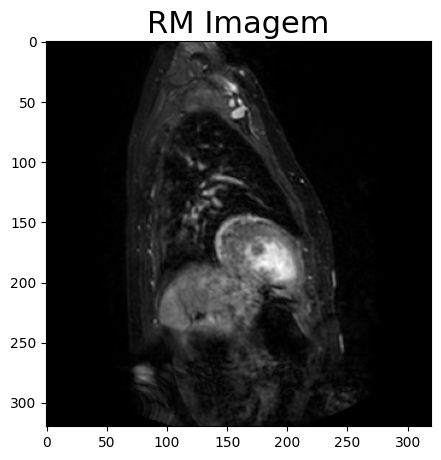

In [17]:
img_rm_2 = cv2.imread("3_slice_18.png", 0)
showSingleImage(img_rm_2, "RM Imagem", (7, 5))

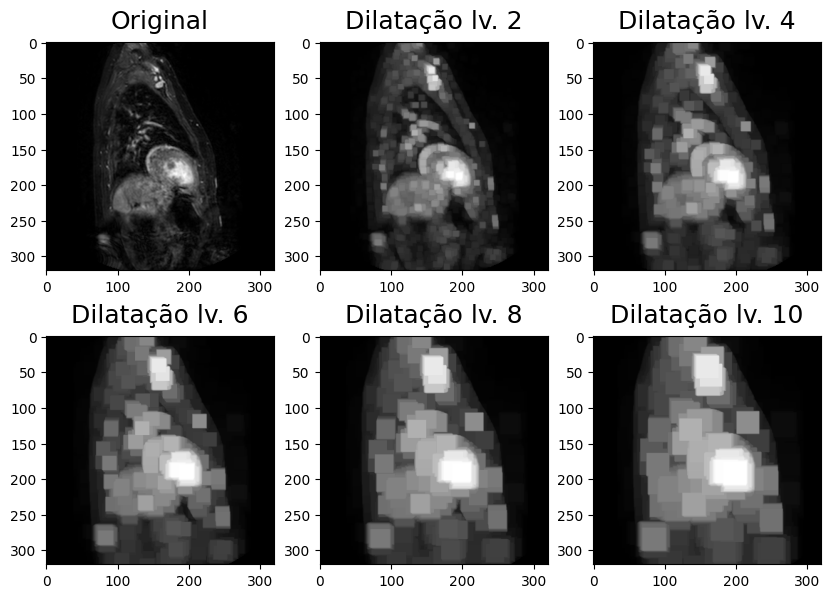

In [18]:
kernel = np.ones((4, 4), np.uint8)

img_rm_2_dil2 = cv2.dilate(img_rm_2, kernel, iterations=2)
img_rm_2_dil4 = cv2.dilate(img_rm_2, kernel, iterations=4)
img_rm_2_dil6 = cv2.dilate(img_rm_2, kernel, iterations=6)
img_rm_2_dil8 = cv2.dilate(img_rm_2, kernel, iterations=8)
img_rm_2_dil10 = cv2.dilate(img_rm_2, kernel, iterations=10)

imgsArray = [img_rm_2, img_rm_2_dil2, img_rm_2_dil4, img_rm_2_dil6, img_rm_2_dil8, img_rm_2_dil10]
titlesArray = ['Original', 'Dilatação lv. 2', 'Dilatação lv. 4', 'Dilatação lv. 6', 'Dilatação lv. 8', 'Dilatação lv. 10']
showMultipleImages(imgsArray, titlesArray, (10, 7), 3, 2)

### Abertura

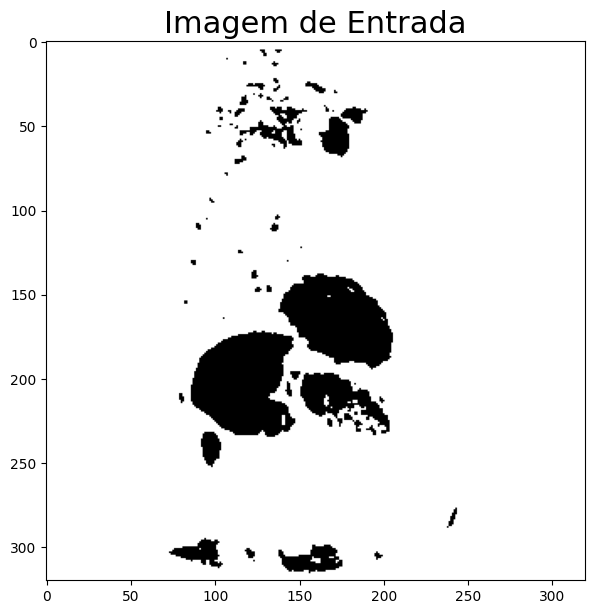

In [42]:
showSingleImage(img_thresh, "Imagem de Entrada", (7, 7))

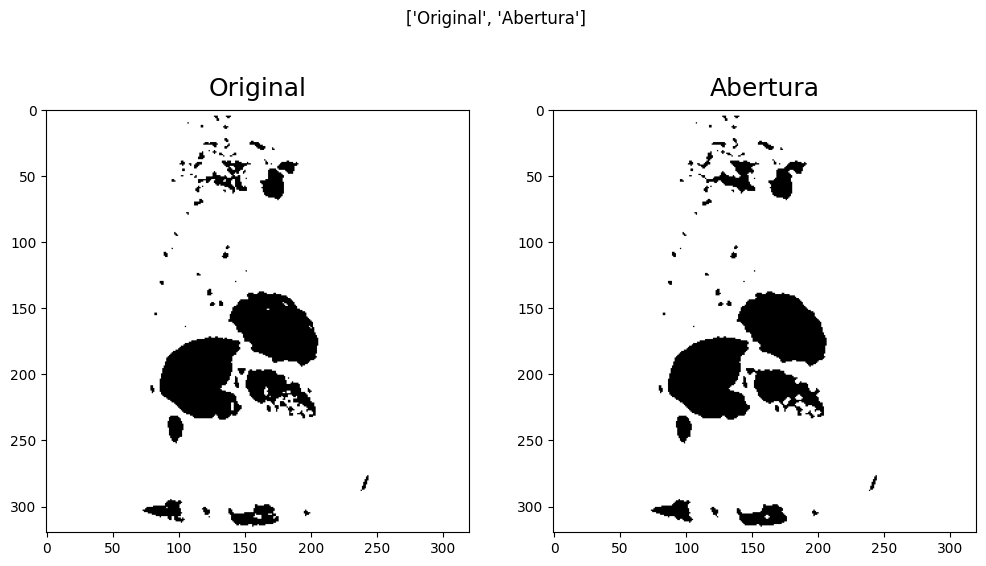

In [43]:
kernel = np.array([[0,1,1,0], [1,1,1,1],[0,1,1,0]], np.uint8)

img_rm_open = cv2.morphologyEx(img_thresh, cv2.MORPH_OPEN, kernel)

imgsArray = [img_thresh, img_rm_open]
titlesArray = ['Original', 'Abertura']
showMultipleImages(imgsArray, titlesArray, (12, 10), 2, 1)

### Fechamento

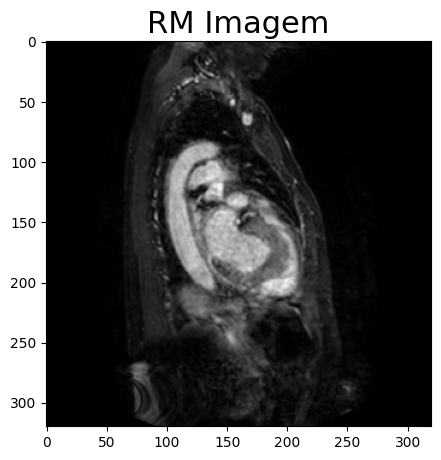

In [21]:
img_rm_4 = cv2.imread("3_slice_39.png")
showSingleImage(img_rm_4, "RM Imagem", (5, 5))

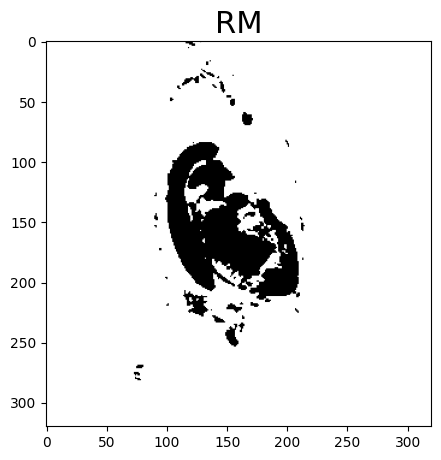

In [22]:
threshold, img_thresh = cv2.threshold(img_rm_4, 100, 255, cv2.THRESH_BINARY_INV)
showSingleImage(img_thresh, "RM", (5, 5))

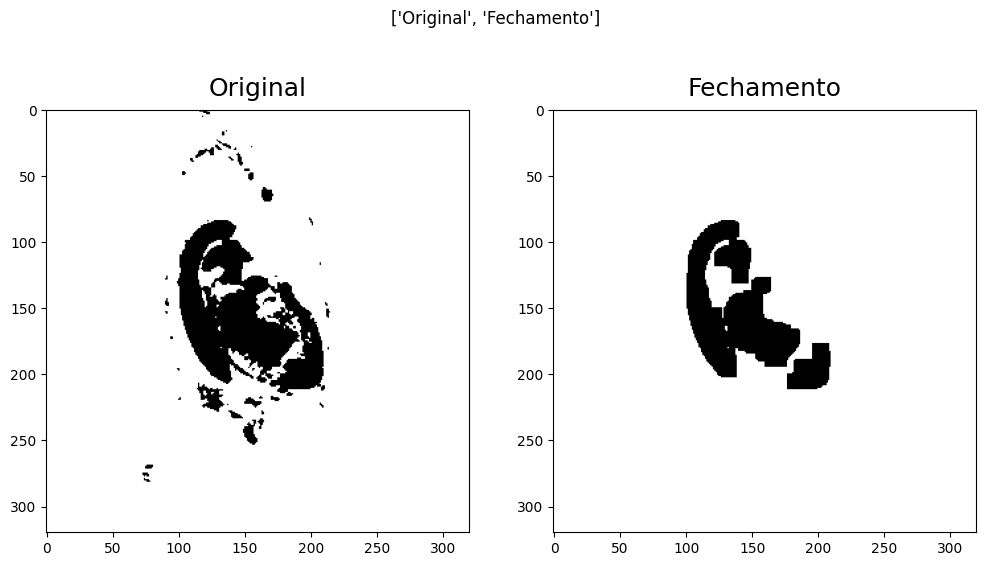

In [23]:
kernel = np.ones((11,11),np.uint8)

img_RM_close = cv2.morphologyEx(img_thresh, cv2.MORPH_CLOSE, kernel)

imgsArray = [img_thresh, img_RM_close]
titlesArray = ['Original', 'Fechamento']
showMultipleImages(imgsArray, titlesArray, (12, 10), 2, 1)

# Gradiente Morfológico


#### Realçar os contornos de uma imagem

In [50]:
img = cv.imread('3_slice_15.png',0)
edges = cv.Canny(img,100,200)

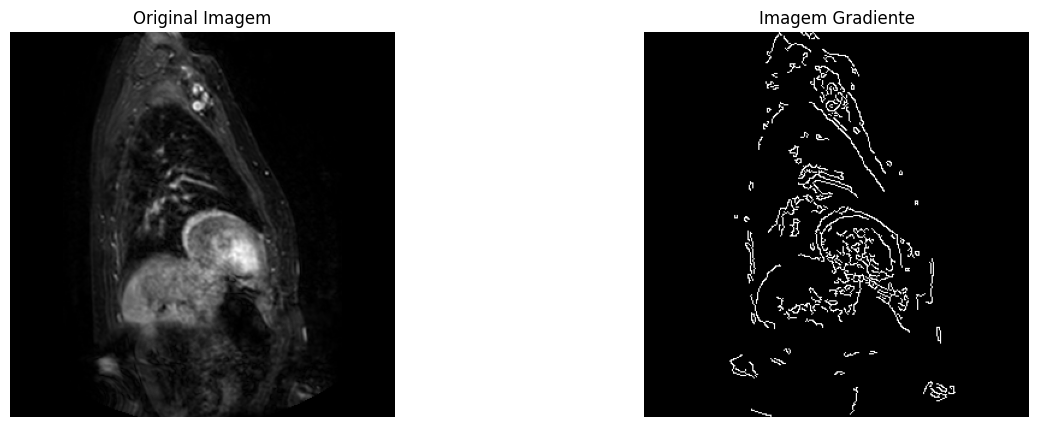

In [52]:
fig, ax = plt.subplots(ncols=2,figsize=(15,5))
ax[0].imshow(img,cmap = 'gray')
ax[0].set_title('Original Imagem')
ax[0].axis('off')
ax[1].imshow(edges,cmap = 'gray')
ax[1].set_title('Imagem Gradiente')
ax[1].axis('off')
plt.show()